# Numpy indexing and slicing

Almost any data that you might visualize and process in Python will be loaded as an array. A stock-market price will be a 1D array, and image a 2D array of pixels etc. Even text that is processed in large language models is encoded as arrays of vectors. Here's an example with an image. We import it here using the PIL library: 

In [1]:
from PIL import Image
import numpy as np

In [2]:
image = Image.open('datasets/woody_baille.JPG')

We can simply display the image in the notebook:

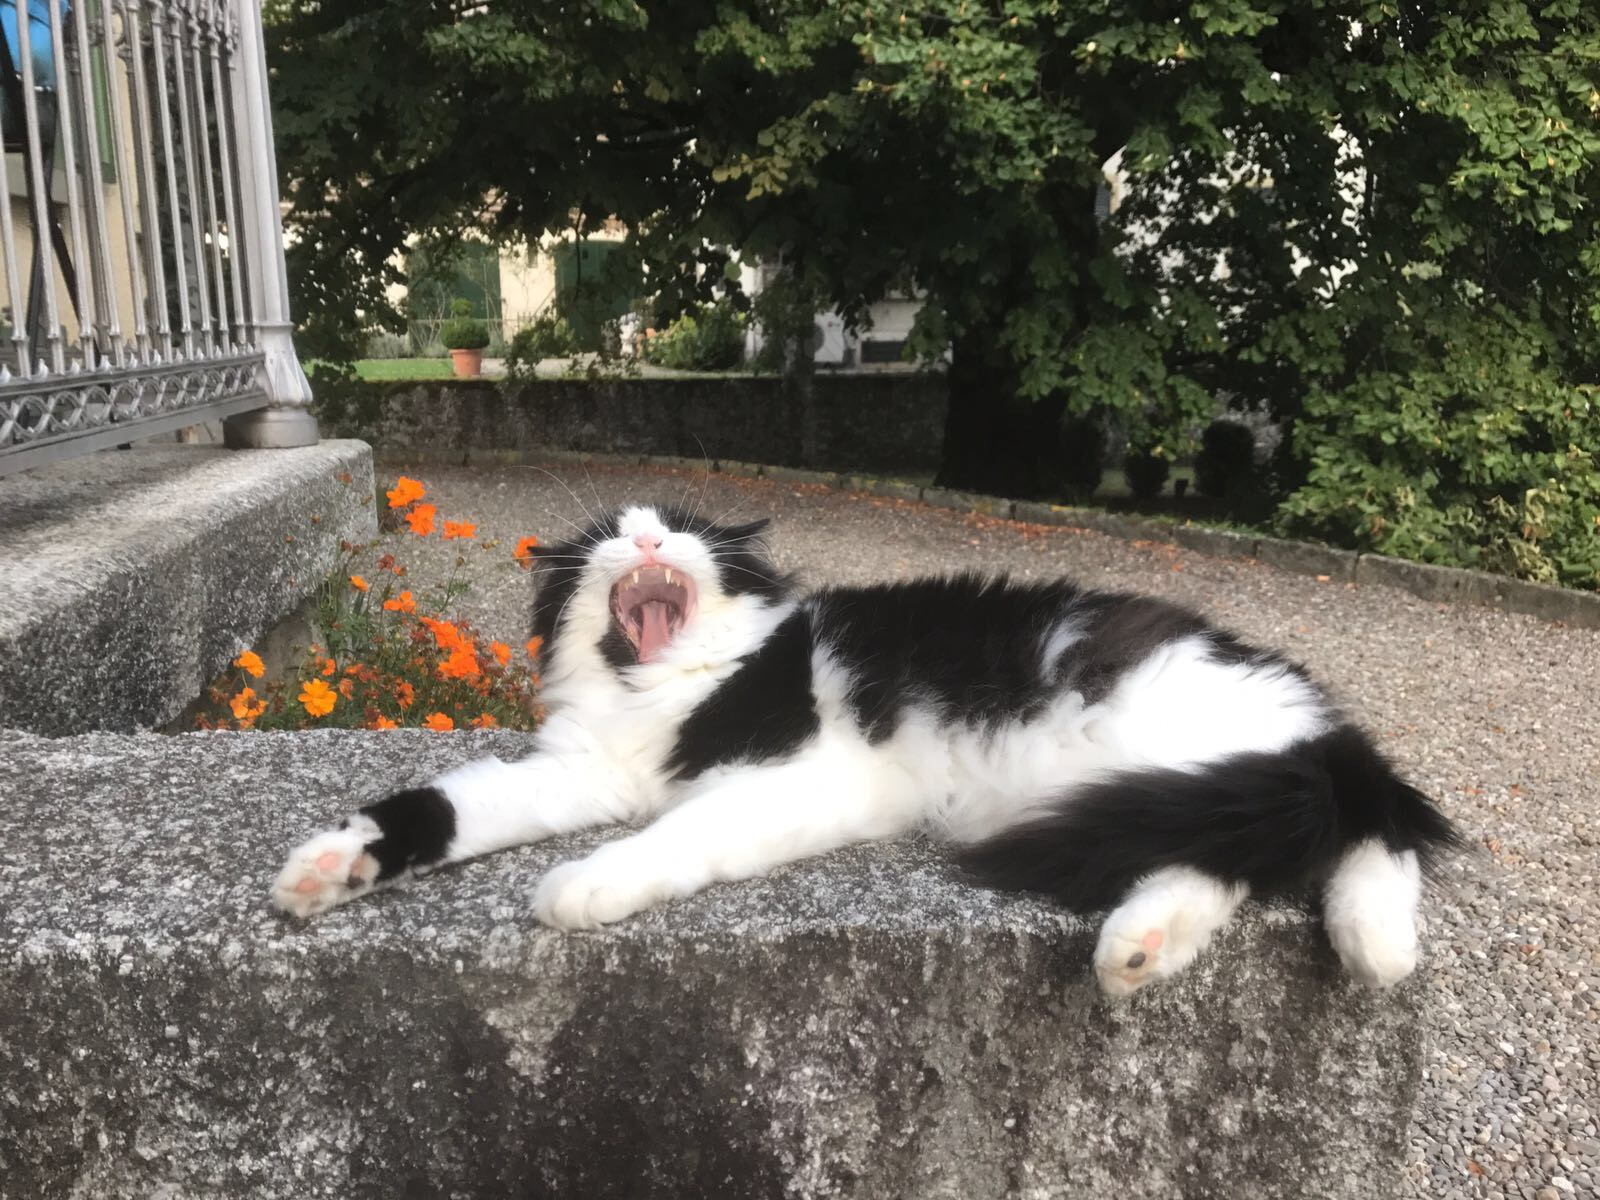

In [3]:
image

But we can also access the actual pixel values by just transforming this object into a Numpy array:

In [4]:
image_array = np.array(image)

In [5]:
image_array

array([[[ 28,  56,  78],
        [ 27,  55,  77],
        [ 26,  53,  74],
        ...,
        [ 29,  32,  21],
        [ 28,  31,  20],
        [ 28,  31,  20]],

       [[ 34,  62,  84],
        [ 34,  62,  84],
        [ 34,  61,  82],
        ...,
        [ 28,  31,  20],
        [ 27,  30,  19],
        [ 26,  29,  18]],

       [[ 39,  69,  93],
        [ 42,  73,  94],
        [ 46,  74,  95],
        ...,
        [ 28,  31,  20],
        [ 26,  29,  18],
        [ 24,  27,  16]],

       ...,

       [[ 79,  72,  64],
        [ 76,  69,  61],
        [ 94,  87,  79],
        ...,
        [ 67,  56,  50],
        [ 65,  54,  48],
        [ 83,  72,  66]],

       [[ 85,  78,  70],
        [ 93,  86,  78],
        [109, 102,  94],
        ...,
        [ 80,  69,  63],
        [ 78,  67,  61],
        [ 90,  79,  73]],

       [[ 81,  74,  66],
        [ 98,  91,  83],
        [114, 107,  99],
        ...,
        [140, 129, 123],
        [123, 112, 106],
        [ 90,  79,  73]]

As we have seen before, this object has a certain shape:

In [6]:
image_array.shape

(1200, 1600, 3)

In this case it is an image of 1200x1600 pixels and composed of three channels for red, green and blue. Typically with an image, we would like to be able to e.g. crop the image by saying which rows and columns of the image we want to keep. Or we might only be interested in values in the array above a certain limit. Cropping and extracting parts of arrays is exactly what indexing and slicing allow us to do. This is a large topic so if you want to know more about this, read the full reference: [Numpy reference](https://numpy.org/doc/stable/reference/arrays.indexing.html#indexing).

## Extracting and setting elements

To simplify things we first create a small array, so that we can visualize what happens:

In [7]:
my_array = np.random.normal(size=10)
my_array

array([ 0.62467364, -0.93662167,  0.37584632, -1.67866641,  0.38515877,
        0.56692557,  1.07324693, -0.3279988 , -0.10518955,  0.05535718])

The standard way to extract information from an array is to used the square parenthesis (bracket) notation. If we want for example to extract the second element of the array we write:

In [8]:
my_array[1]

-0.9366216722090998

Remember that **we start counting from 0** in Python, which is why the *second* element has index 1.

We can extend the notation and extract a range of elements by using the ```from_index:to_index (excluded)``` notation. Here ```excluded``` means that the **last index** specified is **not included**. For example if we want to recover elements with indices from 1 to 3 we write:

In [9]:
my_array[1:4]

array([-0.93662167,  0.37584632, -1.67866641])

We can also set values in the array in the same maner. For example let's set the above elements to 10:

In [10]:
my_array[1:4] = 10

In [11]:
my_array

array([ 0.62467364, 10.        , 10.        , 10.        ,  0.38515877,
        0.56692557,  1.07324693, -0.3279988 , -0.10518955,  0.05535718])

Note that you can sometimes simplify the notation. For example if you want to extract all elements from the 4th one **to the last one**, you don't have to specify the last index, you can simply replace it by ```:```:


In [12]:
my_array[4::]

array([ 0.38515877,  0.56692557,  1.07324693, -0.3279988 , -0.10518955,
        0.05535718])

## Higher dimensions

We have seen before that we can create arrays with more than one dimension (think e.g. of the pixels of an image). For example:

In [13]:
array2D = np.random.normal(size=(3,5))
array2D

array([[-0.45856081,  1.11188724,  0.46444848,  0.31731905, -1.12207957],
       [ 0.52112349, -1.16299156,  0.41369148, -0.29915695,  1.73721883],
       [-0.31742196,  1.09740471, -1.33733474, -0.23963865, -0.16672791]])

The indexing system works in the same way here. We just have to specify now for each dimension which rows/columns we want to extract with ```my_array[start_row:end_row, start_column:end_column]```:

In [14]:
array2D[1:3, 0:2]

array([[ 0.52112349, -1.16299156],
       [-0.31742196,  1.09740471]])

Here again, we can simplify the notation. If we want to select a few rows but **want to keep all columns**, we can again use the ```:``` notation like this:

In [15]:
array2D[1:3, :]

array([[ 0.52112349, -1.16299156,  0.41369148, -0.29915695,  1.73721883],
       [-0.31742196,  1.09740471, -1.33733474, -0.23963865, -0.16672791]])

If we come back to our image example we now know how to crop parts of the image e.g. around the cat:

In [16]:
image_array_crop = image_array[480:1000,280:1450,:]

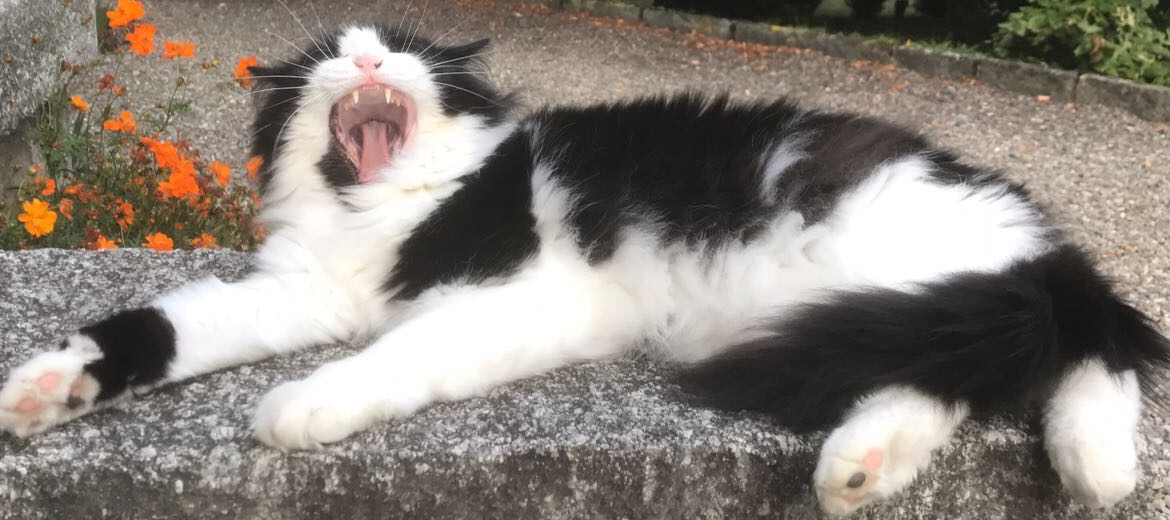

In [17]:
Image.fromarray(image_array_crop)

## Working with sub-parts

Using indexing, we can also create a smaller array that we want to work on specifically. For example let's say we are only interested in the 6th to 8th element. We can **extract** it and **asign** it to a new array:

In [18]:
sub_array = my_array[7:10]

In [19]:
my_array

array([ 0.62467364, 10.        , 10.        , 10.        ,  0.38515877,
        0.56692557,  1.07324693, -0.3279988 , -0.10518955,  0.05535718])

In [20]:
sub_array

array([-0.3279988 , -0.10518955,  0.05535718])

Let's now modify an element of this subarray:

In [21]:
sub_array[0] = 100

Let's check that ```sub_array``` has indeed changed:

In [22]:
sub_array

array([ 1.00000000e+02, -1.05189549e-01,  5.53571786e-02])

Let's now also have a look at the original array:

In [23]:
my_array

array([ 6.24673636e-01,  1.00000000e+01,  1.00000000e+01,  1.00000000e+01,
        3.85158769e-01,  5.66925570e-01,  1.07324693e+00,  1.00000000e+02,
       -1.05189549e-01,  5.53571786e-02])

**The value in the original array has changed too!**. The reason is that the slicing of the array **does not create an independent sub-array**. It is still linked to the original one. Depending on the types of modification, you might or might not encounter this problem. To be on the safe side, explicitely create a **copy** when creating a sub-array. Like that it will be independent from the original one: 

In [24]:
sub_array = my_array[7:10].copy()
sub_array[0] = 200

In [25]:
sub_array

array([ 2.00000000e+02, -1.05189549e-01,  5.53571786e-02])

In [26]:
my_array

array([ 6.24673636e-01,  1.00000000e+01,  1.00000000e+01,  1.00000000e+01,
        3.85158769e-01,  5.66925570e-01,  1.07324693e+00,  1.00000000e+02,
       -1.05189549e-01,  5.53571786e-02])

## Boolean indexing

Instead of using numerical indices to extract values from the array, we can also select them by some criteria. Let's create a new random array:

In [27]:
my_array2 = np.random.normal(size=10)
my_array2

array([-0.47255245,  0.35604376, -0.01939754, -0.67289386,  0.80751616,
       -1.15635488,  0.66993352, -0.87051285, -2.11439771, -1.17356222])

How to proceed now if we for example only want to recover the elements that are larger than 0 ?

Let's try to see what happens when we just write it down as we would in regular mathemetics:

In [28]:
my_array2 > 0

array([False,  True, False, False,  True, False,  True, False, False,
       False])

We see that the output is again an array, but instead of being filled with numbers, it contains only ```False``` and ```True```. Those values also exist in plain Python and are called booleans. For example:

In [29]:
a = 3
a > 10

False

We can now create an actual boolean array:

In [30]:
bool_array = my_array2 > 0
bool_array

array([False,  True, False, False,  True, False,  True, False, False,
       False])

We can now use this **boolean array** ```bool_array``` to extract values from any array of the same size. Imagine that you superpose ```bool_array``` to another array ```value_array``` and only select those values in ```value_array``` which are ```True``` in ```bool_array```. Naturally we can do this with the original array itself. Instead of passing and index ```my_array[i]``` we pass the entire ```bool_array```:

In [31]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/ISDAwPython_day2/raw/master/images/logical_indexing.jpeg',width=700)

In [32]:
my_array2[bool_array] 

array([0.35604376, 0.80751616, 0.66993352])

Naturally this output array is much smaller than the original one as it only contains the values larger than 0.

## Exercise

1. Create a numpy array with values from 0 to 10 in steps of 0.5

2. Extract the the last three elements of the array (without manually setting the array length).

3. Apply a cosine function to the array and store the output in a new array.

4. Create a boolean array telling which values in the array from (3) are smaller than 0.

5. Recover only those values in a new array via indexing.